In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [8]:
df = pd.read_csv('C:/Users/eilon_bd/תוכן מקצועי/Python Projects/Movies_data/MoviesOnStreamingPlatforms_updated.csv',
                 index_col='ID')
movies=df.copy()
movies.drop('Unnamed: 0', axis='columns', inplace=True)
movies.head(10)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
ID,,,,,,,,,,,,,,,
1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
7,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
8,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
9,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0


In [9]:
movies.shape

(16744, 15)

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16744 entries, 1 to 16744
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            16744 non-null  object 
 1   Year             16744 non-null  int64  
 2   Age              7354 non-null   object 
 3   IMDb             16173 non-null  float64
 4   Rotten Tomatoes  5158 non-null   object 
 5   Netflix          16744 non-null  int64  
 6   Hulu             16744 non-null  int64  
 7   Prime Video      16744 non-null  int64  
 8   Disney+          16744 non-null  int64  
 9   Type             16744 non-null  int64  
 10  Directors        16018 non-null  object 
 11  Genres           16469 non-null  object 
 12  Country          16309 non-null  object 
 13  Language         16145 non-null  object 
 14  Runtime          16152 non-null  float64
dtypes: float64(2), int64(6), object(7)
memory usage: 2.0+ MB


In [11]:
movies.isnull().sum()

Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

# Data Cleaning and dealing with nulls

Feature 1 - Age

In [16]:
##Unique values in this catagory
movies.Age.unique()

array(['13', '18', '7', 16.0, '0', '16'], dtype=object)

In [17]:
movies['Age']=movies['Age'].str.replace('+','')
movies['Age']=movies['Age'].str.replace('all','0')
movies['Age'].value_counts()

18    3474
7     1462
13    1255
0      843
16     320
Name: Age, dtype: int64

In [18]:
movies.Age=movies.Age.fillna(movies.Age.median())

In [19]:
##Casting to integers and make sure that we have no missing values left
movies['Age'] = movies['Age'].astype(int)
movies.Age.isnull().sum()

0

Feature 2 - IMDb

In [20]:
##Drop values with no ratings in IMDb
movies.dropna(subset=['IMDb'],inplace=True)

In [23]:
movies.IMDb.isnull().sum()

0

Feature 3 - Rotten Tomatoes

In [24]:
movies['Rotten Tomatoes'].isnull().sum() / movies.shape[0] *100

68.11970568231003

In [25]:
##Drop the whole feature since 68% from the data is missing
movies.drop('Rotten Tomatoes', axis='columns', inplace=True)

The rest of the feature 4 - Directors, Genres, Country, Language and Runtime

In [26]:
movies.isnull().sum()

Title            0
Year             0
Age              0
IMDb             0
Netflix          0
Hulu             0
Prime Video      0
Disney+          0
Type             0
Directors      483
Genres         101
Country        218
Language       372
Runtime        354
dtype: int64

In [27]:
##Calculate the percentage of rows that have missing values
sum([True for index,row in movies.iterrows() if any(row.isnull())])/movies.shape[0] * 100

5.812156062573425

In [28]:
##Delete these rows because:
##There is no exact way to complete the missing values
##All the missing values from these 5 features are only 5% of the data
movies.dropna(subset=['Directors','Genres','Country','Language','Runtime',],inplace=True)

Final check for this section

In [29]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15233 entries, 1 to 16741
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        15233 non-null  object 
 1   Year         15233 non-null  int64  
 2   Age          15233 non-null  int32  
 3   IMDb         15233 non-null  float64
 4   Netflix      15233 non-null  int64  
 5   Hulu         15233 non-null  int64  
 6   Prime Video  15233 non-null  int64  
 7   Disney+      15233 non-null  int64  
 8   Type         15233 non-null  int64  
 9   Directors    15233 non-null  object 
 10  Genres       15233 non-null  object 
 11  Country      15233 non-null  object 
 12  Language     15233 non-null  object 
 13  Runtime      15233 non-null  float64
dtypes: float64(2), int32(1), int64(6), object(5)
memory usage: 1.7+ MB


In [30]:
movies.isnull().sum()

Title          0
Year           0
Age            0
IMDb           0
Netflix        0
Hulu           0
Prime Video    0
Disney+        0
Type           0
Directors      0
Genres         0
Country        0
Language       0
Runtime        0
dtype: int64

# Data Visualisation

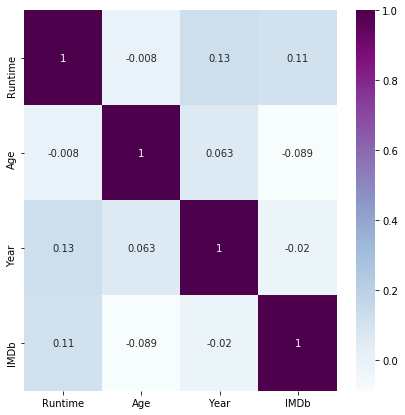

In [32]:
##Checking for correlation between some features and how they effect on the IMDb rank
plt.figure(figsize = (7,7))
sns.heatmap(movies[['Runtime','Age','Year','IMDb',]].corr(),cmap="BuPu",annot=True)

Building necessary functions

In [34]:
##Function builded to split strings from different column each time to analize unique values
##This function made to analyze features: Language, Country, Genres and Directors
def split_for_unique(my_column):
    my_column=[i.split(',') for i in my_column.values]
    values=[]
    unique_values=[]
    for i in range(0,len(my_column)):
        values=values+my_column[i]
    for i in values:
        if i not in unique_values:
            unique_values.append(i)
    return unique_values

In [35]:
##Function builded to count values for columns with splited strings in the data
def count_for_split_col(col_name,col_values):
    my_list=pd.DataFrame()
    my_list[col_name]=col_values
    my_list['Number of movies']= 0
    df1=my_list.to_numpy()
    df2=movies[col_name].to_numpy()
    counter=0
    val_list=[]
    for i in range(len(df1)):
        counter=0
        for j in range(len(df2)):
            if df1[i,0] in df2[j]:
                counter +=1
        val_list.append(counter)
    my_list['Number of movies']=val_list
    return my_list

In [36]:
##Function builded to get the avergae value for columns with splited strings in the data
def avg_for_split_col(col_name,col_values,avg_by_col,desire_list_name):
    my_list=pd.DataFrame()
    my_list[col_name]=col_values
    df1=my_list.to_numpy()
    df2=movies[col_name].to_numpy()
    df3=avg_by_col.to_numpy()
    counter=0
    mid_sum=0
    val_list=[]
    for i in range(len(df1)):
        counter=0
        mid_sum=0
        for j in range(len(df2)):
            if df1[i,0] in df2[j]:
                counter +=1
                mid_sum = mid_sum + df3[j]
        val_list.append(mid_sum / counter)
    my_list[desire_list_name]=val_list
    return my_list

Number of movies in each year

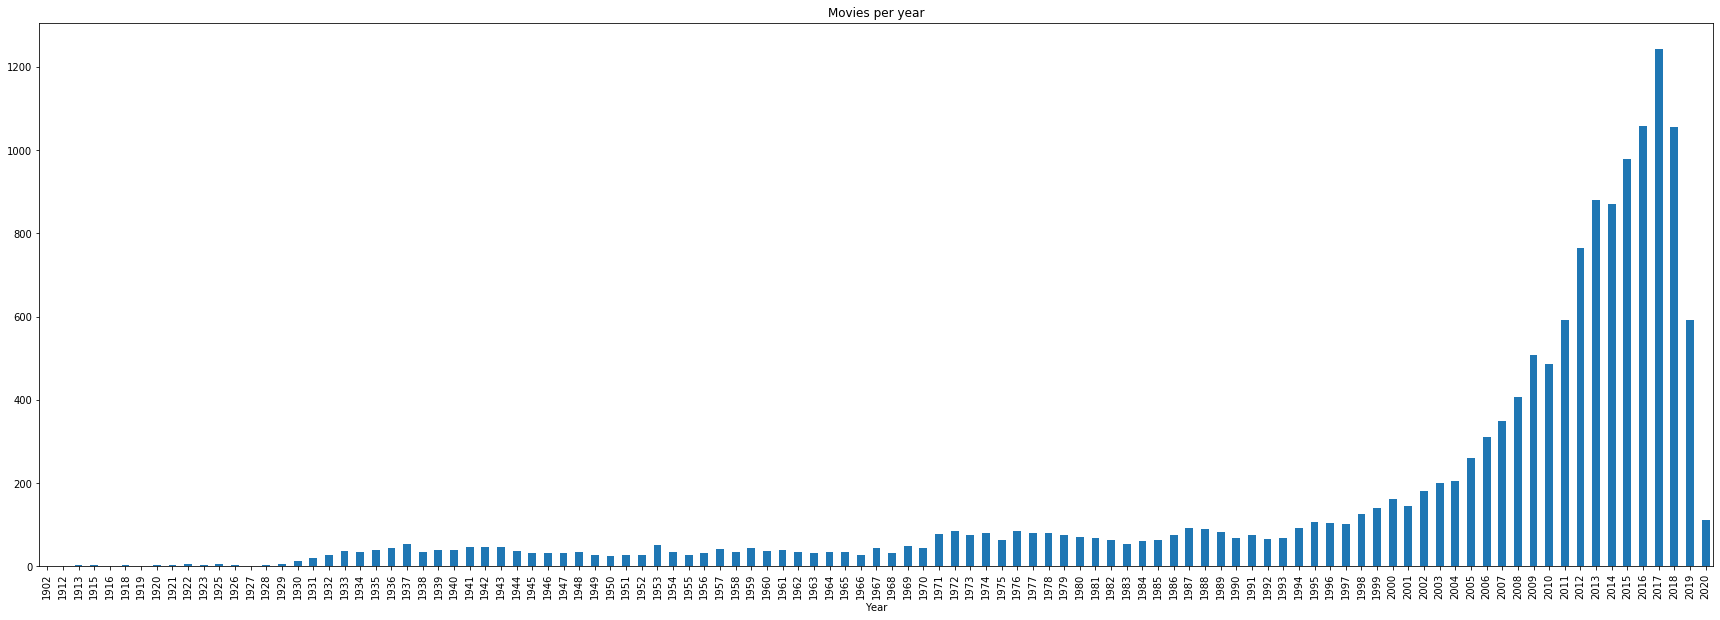

In [37]:
plt.figure(figsize = (30,10))
movies.groupby("Year").Title.count()[:df.Year.unique().shape[0]].plot.bar(x='Number of movies', y='Years',title='Movies per year')

Platform analysis

In [38]:
## Create an array with the unique platforms
platforms=pd.DataFrame(movies[['Netflix','Hulu','Prime Video','Disney+']].sum(),columns=['Number of movies'])
platforms=platforms.sort_values(by='Number of movies', ascending=False)

## Create a data frame for analysis
Platform_list=pd.DataFrame(columns=['Platform','Movies count','IMDb avg rank'])
Platform_list['Platform']=platforms.index.to_numpy()

## Insert the number of movies in each platform
movies_count_list=[movies['Prime Video'].sum(),movies['Netflix'].sum(),movies['Hulu'].sum(),movies['Disney+'].sum()]
Platform_list['Movies count']=movies_count_list

## Calculate the avg IMDb rank for each platform and insert it to the data frame
mean_df_Prime_video=movies.groupby('Prime Video')['IMDb'].mean().reset_index().iloc[1,1]
mean_df_Netflix=movies.groupby('Netflix')['IMDb'].mean().reset_index().iloc[1,1]
mean_df_Hulu=movies.groupby('Hulu')['IMDb'].mean().reset_index().iloc[1,1]
mean_df_Disney=movies.groupby('Disney+')['IMDb'].mean().reset_index().iloc[1,1]

IMDb_avg_list=[mean_df_Prime_video,mean_df_Netflix,mean_df_Hulu,mean_df_Disney]
Platform_list['IMDb avg rank']=IMDb_avg_list
Platform_list=Platform_list.round(2)

Platform_list.set_index(platforms.index.to_numpy(),inplace=True)

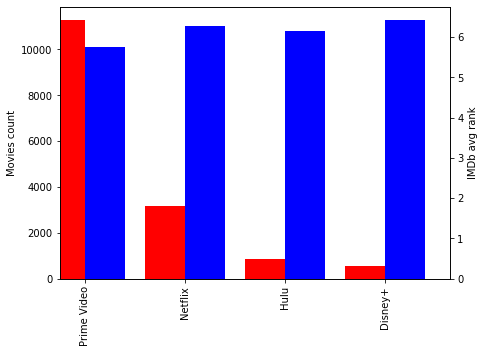

In [39]:
fig = plt.figure(figsize = (7,5)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4
Platform_list['Movies count'].plot(x='Platform',kind='bar', color='red', ax=ax, width=width, position=1)
Platform_list['IMDb avg rank'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)
ax.set_ylabel('Movies count')
ax2.set_ylabel('IMDb avg rank')
plt.show()

Movies length analysis

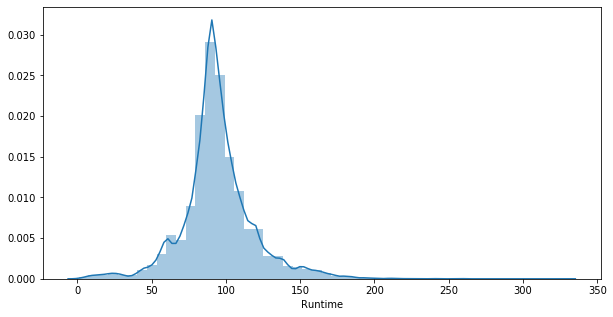

In [40]:
plt.figure(figsize = (10,5))
sns.distplot(movies['Runtime'],label='Runtime',  kde=True,bins=50)

Age related analysis

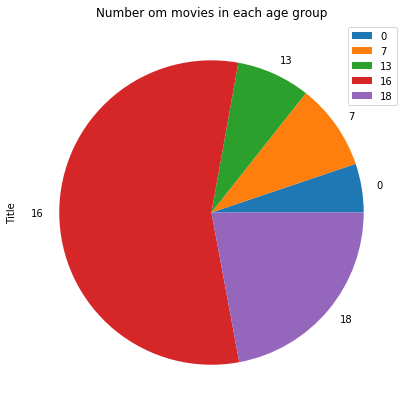

In [44]:
movies.groupby(['Age']).count().plot(kind='pie', y='Title',figsize = (7,7), title='Number om movies in each age group')

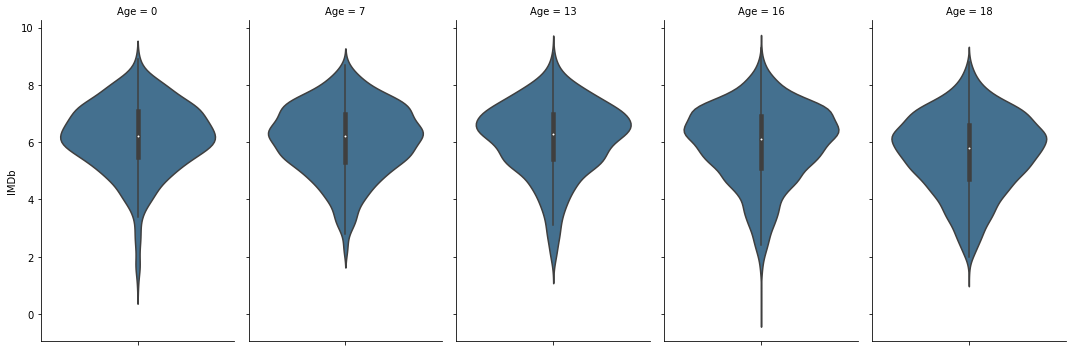

In [46]:
##Show IMDb rating distribution for each age group
vioplot=sns.catplot(y="IMDb", col="Age",data=movies, saturation=.5,kind="violin", ci=None, aspect=.6,margin_titles=True)

Country related analysis

In [47]:
##Using the functions i have build to count the number of movies related to each country
Country=split_for_unique(movies['Country'])
Country_count=count_for_split_col('Country',Country)
bar_df=Country_count.sort_values(by=['Number of movies'], ascending=False).head(10)
bar_df=bar_df.sort_values(by=['Number of movies'], ascending=True)

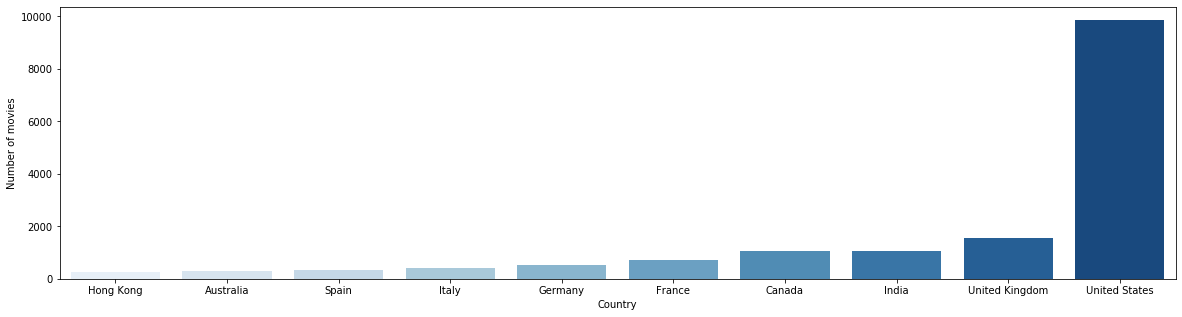

In [48]:
plt.figure(figsize = (20,5))
sns.barplot(x="Country", y="Number of movies", data=bar_df, label="Total", palette=sns.color_palette("Blues",n_colors=10,desat=1))

In [49]:
##Using the functions and the countries from the graph to calculate avg IMDb rank for each country
numpy_arr=bar_df.to_numpy()
numpy_arr=numpy_arr[:,0].T
Rank_by_country=avg_for_split_col('Country',numpy_arr,movies['IMDb'],'IMDb Ranking')
bar_df1=Rank_by_country.sort_values(by=['IMDb Ranking'], ascending=True).head(10)

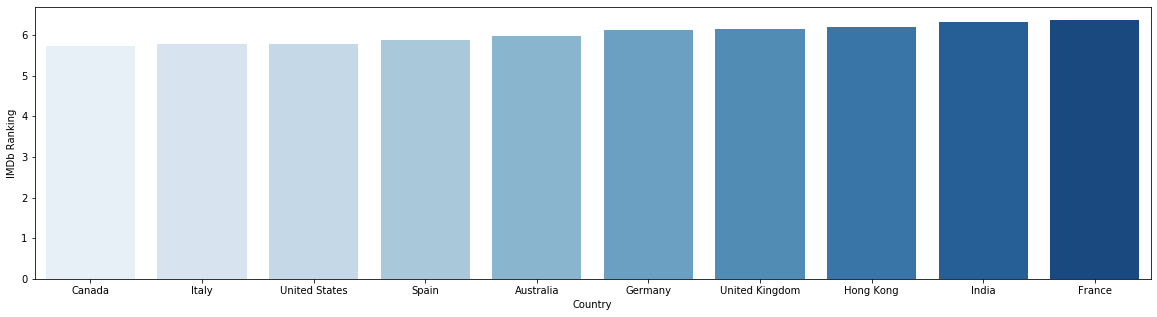

In [50]:
plt.figure(figsize = (20,5))
sns.barplot(x="Country", y="IMDb Ranking", data=bar_df1, label="Total", palette=sns.color_palette("Blues",n_colors=10,desat=1))

Directors related analysis

In [51]:
##Using the functions i have build to count the number of movies related to each Director
Directors=split_for_unique(movies['Directors'])
Directors_count=count_for_split_col('Directors',Directors)
bar_df2=Directors_count.sort_values(by=['Number of movies'], ascending=False).head(10)
bar_df2=bar_df2.sort_values(by=['Number of movies'], ascending=True)

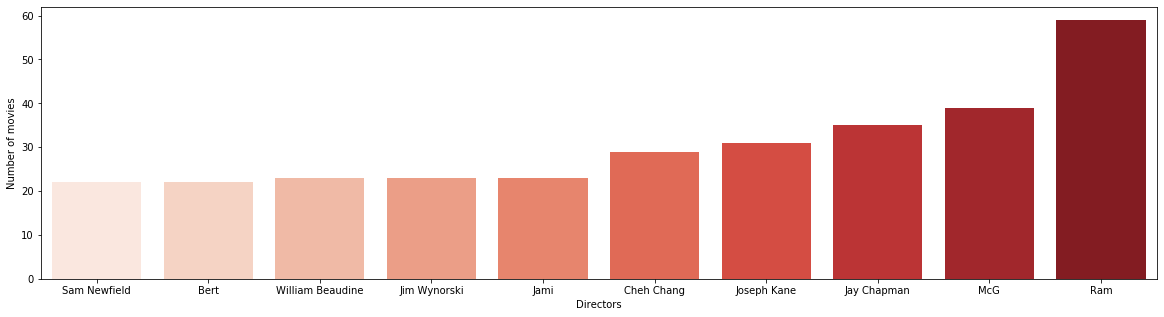

In [52]:
plt.figure(figsize = (20,5))
sns.barplot(x="Directors", y="Number of movies", data=bar_df2, label="Total", palette=sns.color_palette("Reds",n_colors=10,desat=1))

In [53]:
##Using the functions and the directors from the graph to calculate avg IMDb rank for each director
numpy_arr1=bar_df2.to_numpy()
numpy_arr1=numpy_arr1[:,0].T
Rank_by_director=avg_for_split_col('Directors',numpy_arr1,movies['IMDb'],'IMDb Ranking')
bar_df3=Rank_by_director.sort_values(by=['IMDb Ranking'], ascending=True).head(10)

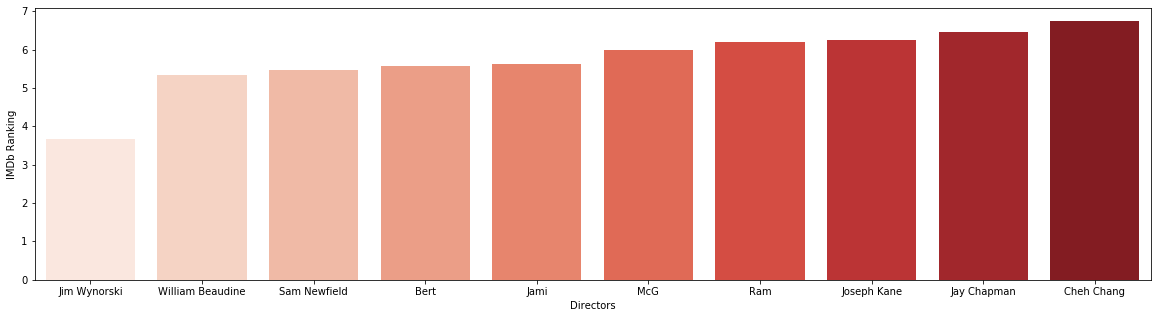

In [54]:
plt.figure(figsize = (20,5))
sns.barplot(x="Directors", y="IMDb Ranking", data=bar_df3, label="Total", palette=sns.color_palette("Reds",n_colors=10,desat=1))

Genres

In [55]:
##Using the functions i have build to count the number of movies related to each Genre
Genres=split_for_unique(movies['Genres'])
Genres_count=count_for_split_col('Genres',Genres)
Genres_count=Genres_count.loc[Genres_count['Genres']!='Thriller']
bar_df4=Genres_count.sort_values(by=['Number of movies'], ascending=False).head(10)
bar_df4=bar_df4.sort_values(by=['Number of movies'], ascending=True)

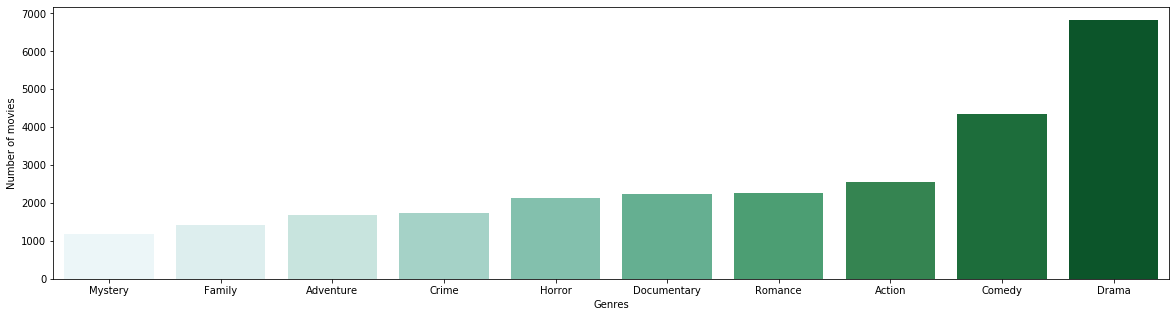

In [56]:
plt.figure(figsize = (20,5))
sns.barplot(x="Genres", y="Number of movies", data=bar_df4, label="Total", palette=sns.color_palette("BuGn",n_colors=10,desat=1))

In [57]:
##Using the functions and the geners from the graph to calculate avg IMDb rank for each genre
numpy_arr2=bar_df4.to_numpy()
numpy_arr2=numpy_arr2[:,0].T
Rank_by_genre=avg_for_split_col('Genres',numpy_arr2,movies['IMDb'],'IMDb Ranking')
bar_df5=Rank_by_genre.sort_values(by=['IMDb Ranking'], ascending=True).head(10)

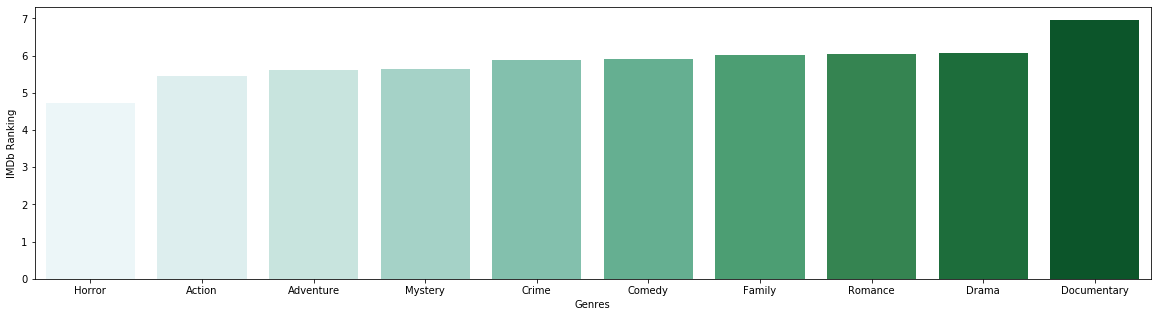

In [58]:
plt.figure(figsize = (20,5))
sns.barplot(x="Genres", y="IMDb Ranking", data=bar_df5, label="Total", palette=sns.color_palette("BuGn",n_colors=10,desat=1))

Language

In [59]:
##Using the functions i have build to count the number of movies related to each Language
Languages=split_for_unique(movies['Language'])
Languages_count=count_for_split_col('Language',Languages)
bar_df6=Languages_count.sort_values(by=['Number of movies'], ascending=False).head(10)
bar_df6=bar_df6.sort_values(by=['Number of movies'], ascending=True)

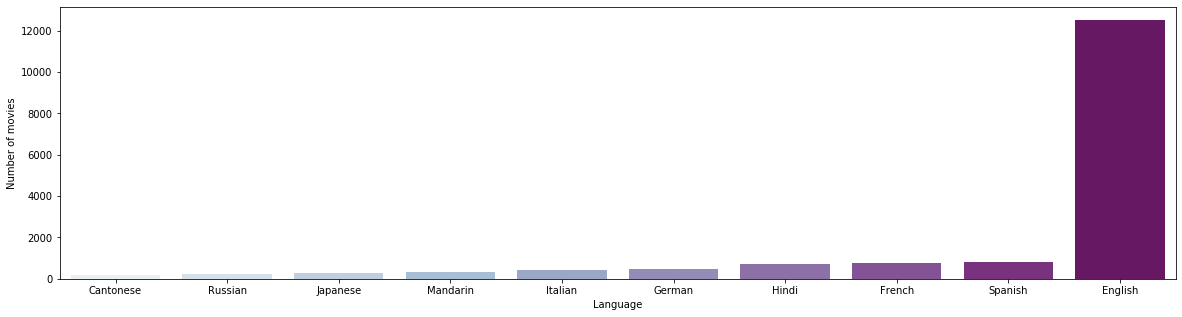

In [60]:
plt.figure(figsize = (20,5))
sns.barplot(x="Language", y="Number of movies", data=bar_df6, label="Total", palette=sns.color_palette("BuPu",n_colors=10,desat=1))

In [61]:
##Using the functions and the Languages from the graph to calculate avg IMDb rank for each Language
numpy_arr3=bar_df6.to_numpy()
numpy_arr3=numpy_arr3[:,0].T
Rank_by_Language=avg_for_split_col('Language',numpy_arr3,movies['IMDb'],'IMDb Ranking')
bar_df7=Rank_by_Language.sort_values(by=['IMDb Ranking'], ascending=True).head(10)

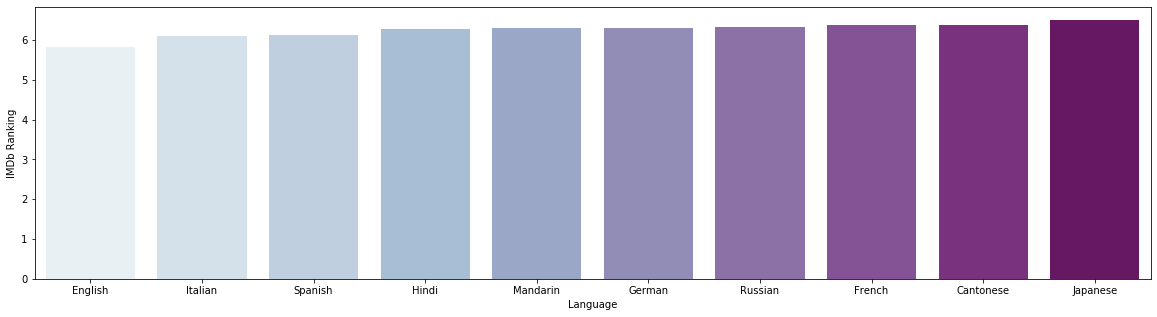

In [62]:
plt.figure(figsize = (20,5))
sns.barplot(x="Language", y="IMDb Ranking", data=bar_df7, label="Total", palette=sns.color_palette("BuPu",n_colors=10,desat=1))